In [1]:
import pandas as pd


data = pd.read_excel(r'C:\Users\Diego\Desktop\circleplot.xlsx', sheetname='datos')
dias = pd.read_excel(r'C:\Users\Diego\Desktop\circleplot.xlsx', sheetname='dias')
data = data.round(2)
data = data.set_index('doy')
dias = dias.set_index('Parametro')
#data['C'][1] = 0.5
#data['C'][17] = 0.75
#data['C'][33] = 0.5
#data.head()
e = 'P. pinea'
'''for i in dias[e].index:
    
    val = dias.get_value(i, e)
    index = i
    print(index, val)'''
    
data.head()
    

,P. sylvestris,P. nigra (b),P. nigra (a),P. pinaster,P. pinea,P. halepensis
doy,,,,,,
4,0.73,0.71,0.72,0.75,0.75,0.67
17,0.72,0.70,0.71,0.74,0.74,0.67
33,0.70,0.69,0.70,0.73,0.73,0.66
49,0.69,0.68,0.68,0.71,0.72,0.65
65,0.68,0.67,0.66,0.70,0.71,0.63


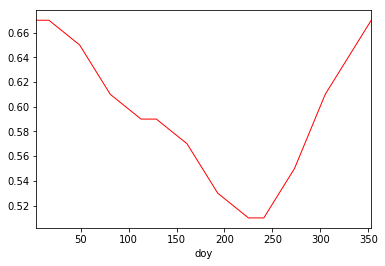

In [2]:
%matplotlib inline
data['P. halepensis'].plot(color='red', lw=1)

Habría que hacer un upsampling para pasar los datos puntuales a datos contínuos a lo largo de todo el año

from calendar import isleap

lista = [2010, 2011, 2012, 2013, 2014]

for i in lista:
    if isleap(i):
        days = 366
    else:
        days = 365
    print(days)

In [22]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

aa = np.load('my_cmap.npy').item()
colores = {'SOS': 'red', 'MOS': 'black', 'EOS': 'orange'}
markers = {'SOS': 5, 'MOS': 'd', 'EOS': 4}

def FC(datos, indice):
    
    data = pd.read_excel(datos, sheetname='datos')
    data = data.round(2)
    data = data.set_index(indice)
    days = pd.read_excel(datos, sheetname='dias')
    days = days.set_index('Parametro')
    #Probamos hacer una lista de colores para poder invertirla
    #No hay que invertir, se usa counterclock=False!
    
    subgroup_names=[i for i in range(len(data[data.columns[0]]))]
    subgroup_size= len(data[data.columns[0]])*[10]
    months_size = 12*[30]
    month_names=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    #Rampa de colores, Quizas quedaria mejor una personalizada y que fuera desde -1 hasta 1 (por si incluye agua)
    c = plt.cm.Greens

    #norm = mpl.colors.Normalize(vmin=0.5, vmax=0.75)
    # First Ring (outside)
    fig, ax = plt.subplots(figsize=(20, 20))
    #plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
    ax.axis('equal')
    #mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)])
    #plt.setp( mypie, width=0.3, edgecolor='red')

    #Normalizacion de valores
    #norm = mpl.colors.Normalize(vmin=0.5,vmax=0.75)

    # Second Ring (Inside)
    r = 1
    rlist = []
    
    minimo = min(data.min()) -0.2
    maximo = max(data.max())
    norm = mpl.colors.Normalize(vmin=minimo,vmax=maximo)
        
    for i in data.columns:
        
        
        
        #norm2 = mpl.colors.Normalize(vmin=0.35,vmax=0.85)
        
        mypie, _ = ax.pie(subgroup_size, radius=r, startangle=90, counterclock=False, colors = [c(norm(n)) for n in data[i]])
                          #colors = [aa[int(n)] for n in data[i]])
                           #colors = [c(norm(n)) for n in data[i]])
                            #diccionario con los valores
                           #colors=[aa[int(n*100)] for n in data[i]
                          #[c[str(n)] for n in data[i]][::-1])
        #[c(norm2(i)) for i in data[i]][::-1])
        plt.setp(mypie, width=0.1, edgecolor='none')
        plt.margins(0,0)
        
        #Empezamos a plotear los seasonsdays
        for ix in days[i].index:
    
            val = days.get_value(ix, i)
            
            index = ix
            #print(index, val)
            
            color = colores[index]
            
            if index == 'SOS':
                marker=(3, 0, (90 - val)-180)
                inicenter = ((r-0.05)*math.cos((90-(val+0.7))/180.0*math.pi))
                endcenter = ((r-0.05)*math.sin((90-(val+0.7))/180.0*math.pi))
            elif index == 'MOS':
                marker=(4, 0, (90-val))
                inicenter = ((r-0.05)*math.cos((90-val)/180.0*math.pi))
                endcenter = ((r-0.05)*math.sin((90-val)/180.0*math.pi))
            elif index == 'EOS':
                marker=(3, 0, (90-val)-180)
                inicenter = ((r-0.05)*math.cos((90-(val-1))/180.0*math.pi))
                endcenter = ((r-0.05)*math.sin((90-(val-1))/180.0*math.pi))
                
            # = markers[index]
            
            inipoint = ((r-0.1)*math.cos((90-val)/180.0*math.pi))
            #inicenter = ((r-0.05)*math.cos((90-val)/180.0*math.pi))
            end = ((r-0.1)*math.sin((90-val)/180.0*math.pi))
            #endcenter = ((r-0.05)*math.sin((90-val)/180.0*math.pi))
            ax.plot((inipoint, r*math.cos((90-val)/180.0*math.pi)), (end, r*math.sin((90-val)/180.0*math.pi)), lw=2, c=colores[index])
            #ax.plot(inicenter, endcenter, marker=marker, c=color)
            #Marcadores
            #ax.plot(inicenter, endcenter, marker=marker, color=colores[index], ms=11)
            
            #Probando con SCATTER
            aaa = ax.scatter(inicenter, endcenter, marker=marker, color=colores[index], zorder=10, s=200)
            plt.legend([aaa], ["prueba legend"])
            
            #ax.plot((inipoint, r*math.cos((90-val)/180.0*math.pi)), (end, r*math.sin((90-val)/180.0*math.pi)), 
                    #marker=marker, lw=2, ms=4, c=color)
        #rlist.append('{:1f}'.format(r))
        #circle = plt.Circle((0, 0), r-0.1, color='black', lw=2, fill=False)
        #circle2 = plt.Circle((0, 0), r, color='black', lw=2, fill=False)

        #ax.add_artist(circle)
        #ax.add_artist(circle2)
        
        #colorbar(cm.RdYlGn)
        rlist.append('{:1f}'.format(r))
        r+=0.1

        

        #print(rlist)
        
    #for i in rlist:
        
        circle = plt.Circle((0, 0), r-0.2, color='black', lw=0.5, fill=False)
        ax.add_artist(circle)
        
        #lista = [15, 105, 180, 277]
        
        #Meter esto dentro del bucle para hacer pruebas    
    
    circle2 = plt.Circle((0, 0), r-0.1, color='black', lw=2, fill=False)
    ax.add_artist(circle2)
    
    mypie7, _ = ax.pie(months_size, radius=float(max(rlist)), startangle=90, labels=month_names, counterclock=False, 
                   colors=['none', 'none', 'none'])
    plt.setp( mypie7, width=len(rlist)/10, edgecolor='black', lw=1)
    plt.margins(0,0)
    
    #lineas = [45, 135, 190, 250]
    '''for i in lineas:
        
        rc = 0.9
        inipoint = (rc*math.cos(i/180.0*math.pi))
        end = (rc*math.sin(i/180.0*math.pi))
        ax.plot((inipoint, 1.1*math.cos(i/180.0*math.pi)), (end, 1.1*math.sin(i/180.0*math.pi)), lw=3)'''
        
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
       
    ax_cb = fig.add_axes([.9,.25,.015,.25])
    cmm = [i for i in aa.values()]
    cmap = mpl.colors.ListedColormap(cmm)
    #b2 = [round(i,2) for i in np.linspace(minimo, maximo, 5)]
    bounds = np.linspace(0,1,100)
    #bounds = np.linspace(minimo, maximo, 5)#[-1.0, -0.5, -0.2, 0.0, 0.5, 1.0]
    #norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                    boundaries= bounds,
                                    ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                                    spacing='uniform',
                                    orientation='vertical')
    cb.set_label('Custom extension lengths, some other units')
    cb.ax.yaxis.set_label_position(position='left')
    cb.ax.set_alpha(.5)
    cb.set_label('NDVI Values')
    
    #print(rlist)
    plt.savefig(r'C:/Users/Diego/Desktop/phenologyGraphX.jpg', dpi=300)
    return plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


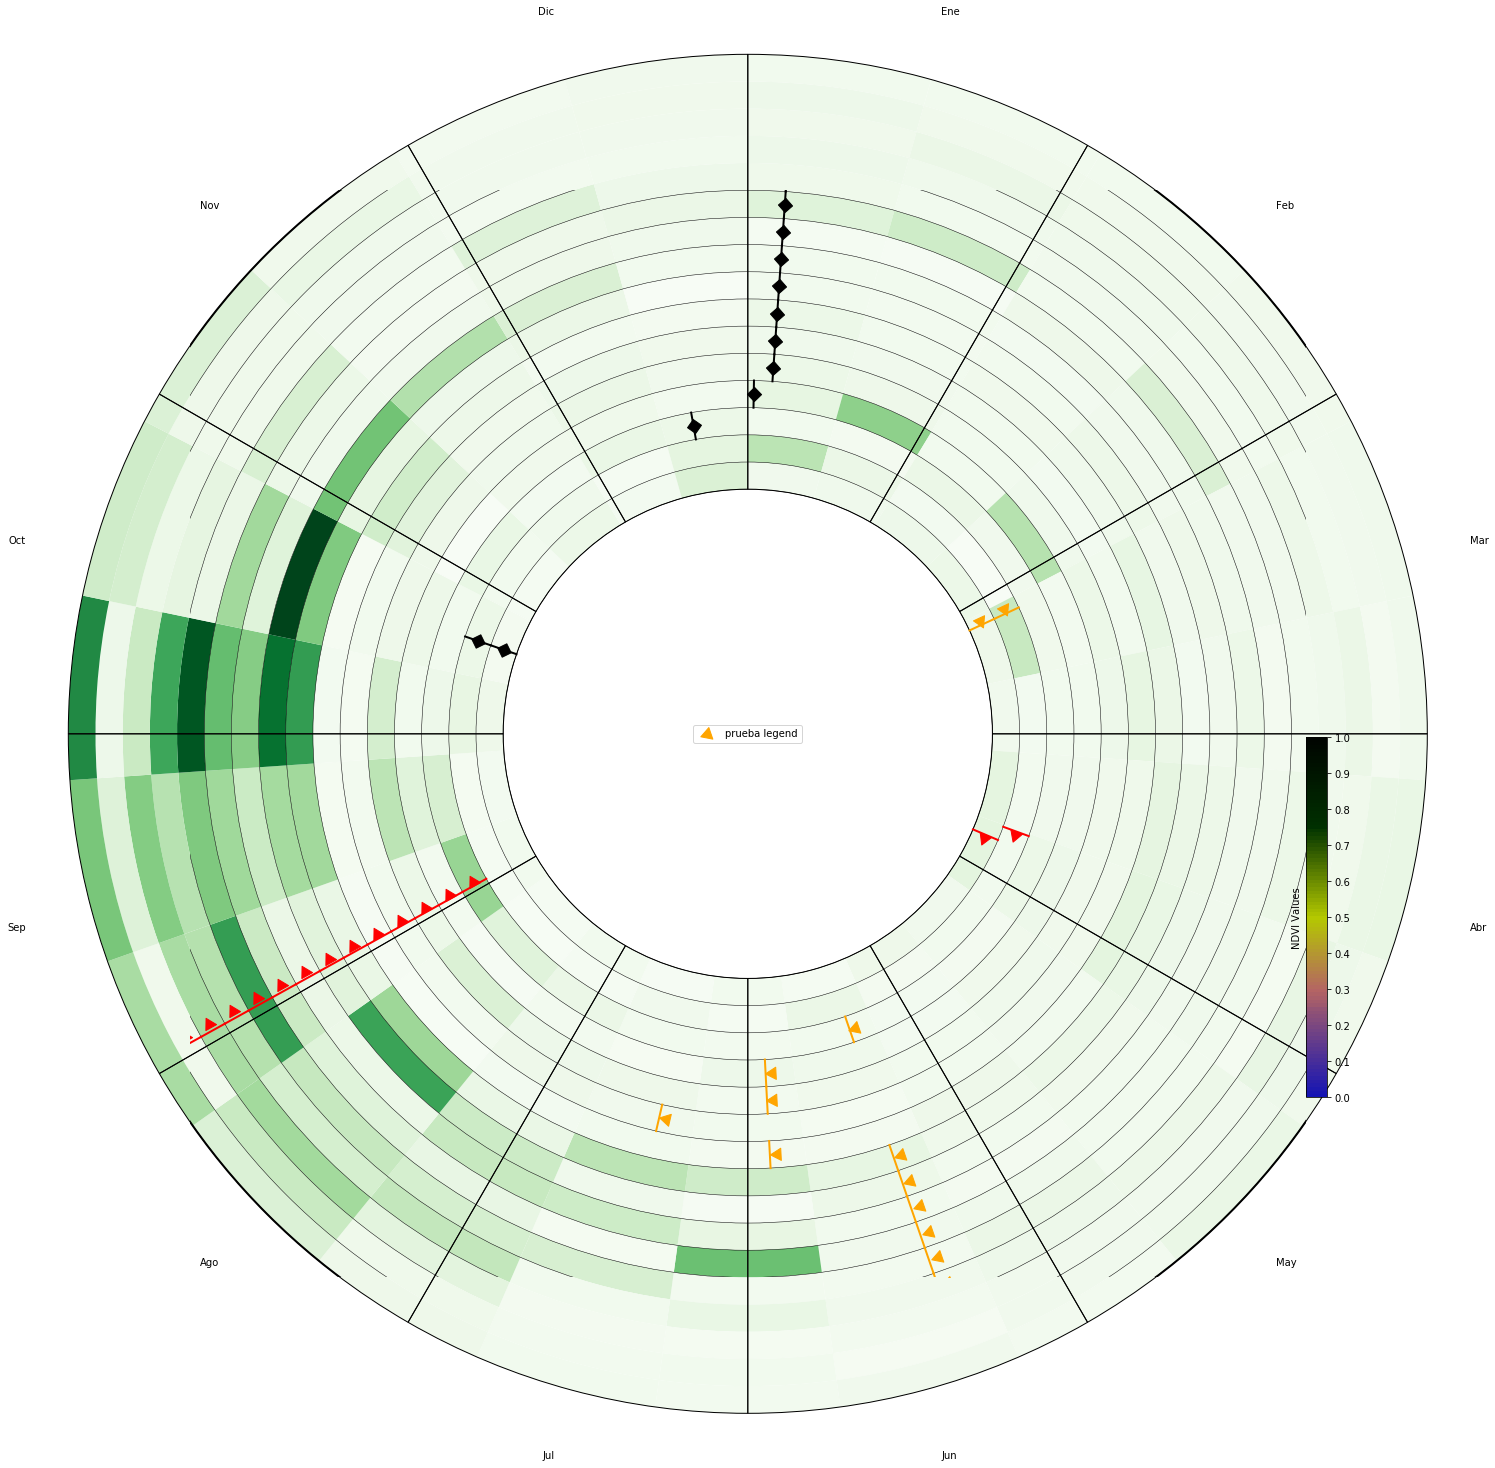

In [23]:
FC(r'C:\Users\Diego\Desktop\Phenocircle\PhenoEmbalsesVDCNS.xlsx', 'doy')

In [27]:
cmm = [i for i in aa.values()]
type(cmm)

list

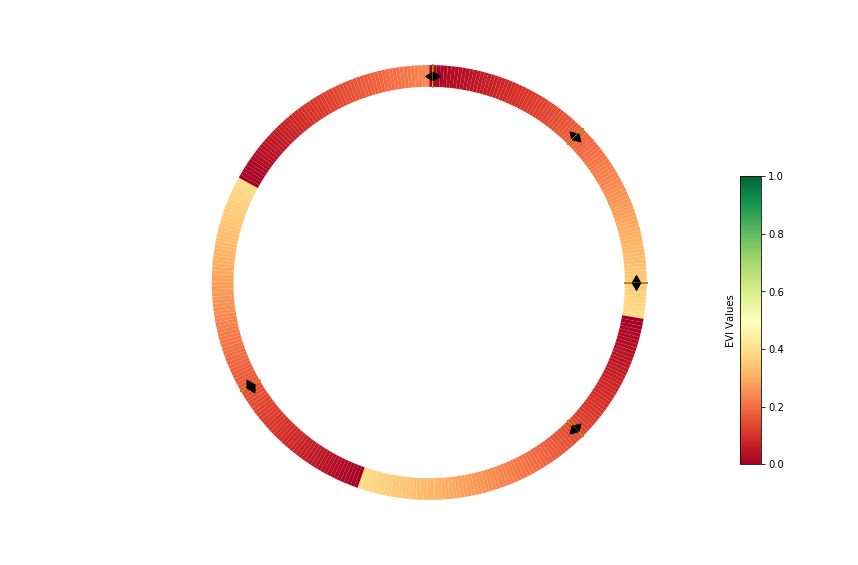

In [30]:
import random, math, numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import transforms as tf

subgroup_size= 365*[1]
fig, ax = plt.subplots(figsize=(15,10))
ax.axis('equal')

c = plt.cm.RdYlGn

wedges, _ = ax.pie(subgroup_size, radius=1, startangle=90, counterclock=False, colors=[c(i) for i in range(101)])
colors = 365* ['none']

for w in wedges:
    #w.set_linewidth(random.randint(0,5))
    w.set_edgecolor(colors[random.randint(0,1)])


plt.setp(wedges, width=0.1, lw=1)

#ASI SÍ!
lista = [1, 45, 90, 135, 240]
nlista = [(90-i) for i in lista]
for i in nlista:
    
    #Meter esto dentro del bucle para hacer pruebas
    #funciona subiendole o bajandole 0.7 segun vaya el triangulo
    inipoint = (0.9*math.cos(i/180.0*math.pi))
    inicenter = ((0.95)*math.cos((i+0.7)/180.0*math.pi))
    end = (0.9*math.sin(i/180.0*math.pi))
    endcenter = ((0.95)*math.sin((i+0.7)/180.0*math.pi))
    ax.plot((inipoint, 1*math.cos(i/180.0*math.pi)), (end, 1*math.sin(i/180.0*math.pi)), color='black')
    
    
    
    #ax.plot((inipoint, 1*math.cos(i/180.0*math.pi)), (end, 1*math.sin(i/180.0*math.pi)))
    #ax.plot((-0.8, 1*math.cos(i/180.0*math.pi)), (-0.8, 1*math.sin(i/180.0*math.pi)))
    ax.plot(inicenter, endcenter, marker=(3, 0, (i)), color='black', ms=10)
    
for i in nlista:
    
    #Meter esto dentro del bucle para hacer pruebas
    #funciona subiendole o bajandole 0.7 segun vaya el triangulo
    inipoint = (0.9*math.cos(i/180.0*math.pi))
    inicenter = ((0.95)*math.cos((i-0.7)/180.0*math.pi))
    end = (0.9*math.sin(i/180.0*math.pi))
    endcenter = ((0.95)*math.sin((i-0.7)/180.0*math.pi))
    ax.plot((inipoint, 1*math.cos(i/180.0*math.pi)), (end, 1*math.sin(i/180.0*math.pi)), color='#d5aa05')
    
    
    
    #ax.plot((inipoint, 1*math.cos(i/180.0*math.pi)), (end, 1*math.sin(i/180.0*math.pi)))
    #ax.plot((-0.8, 1*math.cos(i/180.0*math.pi)), (-0.8, 1*math.sin(i/180.0*math.pi)))
    ax.plot(inicenter, endcenter, marker=(3, 0, (i-180)), color='black', ms=10)
    
    
#ax.plot((inipoint, 1*math.cos(180/180.0*math.pi)), (end, 1*math.sin(180/180.0*math.pi)), lw=2, c='red')

ax_cb = fig.add_axes([.8,.25,.02,.4])
cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=c)

#cb.ax.yaxis.set_tick_params(pad=5)
cb.ax.yaxis.set_label_position(position='left')
cb.ax.set_alpha(.5)




#mpl.colorbar.ColorbarBase(ax_cb, cmap=my_cmap, norm=my_norm, ticks=color_vals)

cb.set_label('EVI Values')

plt.show()

In [22]:
colores['0.52']

'#ca9d07'

In [98]:
def point_on_circle(angle):
...     '''
...         Finding the x,y coordinates on circle, based on given angle
...     '''
...     from math import cos, sin, pi
...     #center of circle, angle in degree and radius of circle
...     center = [0,0]
...     #angle = pi / 2
...     radius = 100
...     x = center[0] + (radius * cos(angle))
...     y = center[1] + (radius * sin(angle))
... 
...     return x,y

In [ ]:
point_on_circle(45)

In [ ]:
subgroup_names=[i for i in range(23)]
subgroup_size= 12*[30]
ss= [10, 20, 50, 15]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.RdYlGn, plt.cm.hsv]
#norm = mpl.colors.Normalize(vmin=0.5, vmax=0.75)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(15,10))
ax.axis('equal')

mypie6, _ = ax.pie(ss, radius=1.5, startangle=94, 
                   colors=['none', 'none', 'none'])
plt.setp( mypie6, width=-0.6, edgecolor=colors[random.randint(0,3)], lw=2)
plt.margins(0,0)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#r =  np.genfromtxt('data.csv',delimiter=',')
p = [i - 0.01 for i in range(360)]
rr = r = [i * 5 for i in range(73)]
#data is a list of 73 data points taken at each 5 degree increment
theta = np.linspace(0, 2 * np.pi, 360)
a, b, c = theta[10:13]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, p)
print(theta, p)
#ax.plot(theta[20:30], rrr[20:30])
#ax.plot([(a, 40), (c,20)])

ax.set_rmax(100)
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
#ax.set_rlabel_position(90)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("Polar", va='bottom')
plt.show()

In [ ]:
for i in theta:
    print(i)

In [ ]:
#hh['0.6'] = hh.pop('0.60')
hh

In [35]:
# Libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#Probamos hacer una lista de colores para poder invertirla

# Make data: I have 3 groups and 7 subgroups
#group_names=['groupA', 'groupB', 'groupC']
#group_size=[12,11,30]
subgroup_names=[i for i in range(23)]
subgroup_size= 23*[5]
months_size = 12*[30]
month_names=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.RdYlGn, plt.cm.hsv]
#norm = mpl.colors.Normalize(vmin=0.5, vmax=0.75)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(15,10))
ax.axis('equal')
#mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)])
#plt.setp( mypie, width=0.3, edgecolor='red')

#Normalizacion de valores
norm = mpl.colors.Normalize(vmin=min(data.min()),vmax=max(data.max()))

# Second Ring (Inside)
'''mypie2, _ = ax.pie(subgroup_size, radius=0.8, labels=subgroup_names, labeldistance=0.7, startangle=94, 
                   colors=[hh[str(i)] for i in data['A']][::-1])
plt.setp(mypie2, width=0.1, edgecolor='none')
plt.margins(0,0)'''

# Third Ring (Inside)
mypie3, _ = ax.pie(subgroup_size, radius=0.9, startangle=90, 
                   colors=[b(norm(i)) for i in data['P. sylvestris']][::-1])
plt.setp( mypie3, width=0.1, edgecolor='none')
plt.margins(0,0)



# Fourth Ring (Inside)
mypie4, _ = ax.pie(subgroup_size, radius=1, startangle=90, 
                   colors=[b(norm(i)) for i in data['P. nigra (a)']][::-1])
plt.setp( mypie4, width=0.1, edgecolor='none')
plt.margins(0,0)

# Fifth Ring (Inside)
mypie5, _ = ax.pie(subgroup_size, radius=1.1, startangle=90, 
                   colors=[b(norm(i)) for i in data['P. nigra (b)']][::-1])
plt.setp( mypie5, width=0.1, edgecolor='none')
plt.margins(0,0)


# Sixth Ring (Inside)
mypie6, _ = ax.pie(subgroup_size, radius=1.2, startangle=90, 
                   colors=[b(norm(i)) for i in data['P. pinea']][::-1])
plt.setp( mypie6, width=0.1, edgecolor='none')
plt.margins(0,0)

mypie7, _ = ax.pie(months_size, radius=1.2, startangle=90, labels=month_names, counterclock=False, 
                   colors=['none', 'none', 'none'])
plt.setp( mypie7, width=0.4, edgecolor='black', lw=2)
plt.margins(0,0)

'''circle1 = plt.Circle((0, 0), 0.9, color='r', lw=3, fill=False)
circle2 = plt.Circle((0, 0), 0.8, color='r', lw=3, fill=False)
circle3 = plt.Circle((0, 0), 1.1, color='r', lw=3, fill=False)
circle4 = plt.Circle((0, 0), 1.2, color='r', lw=3, fill=False)

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)'''

# show it
plt.savefig(r'C:\Users\Diego\Desktop\CursosLAST\phenologyGraph.jpg', dpi=500)
plt.show()

NameError: name 'data' is not defined

In [ ]:
colorsx = []
for i in data['C']:
    colorsx.append(c(i))
    
colorsa  = [b(i) for i in data['A']]

In [ ]:
#colormap = {valor:codigo} diccionario con los colores

values = [0.5 + 0.01 for i in range(len(25))]

In [ ]:
for i in colormap.items():
    print(i)

In [2]:
vals = []
n = 0.5
for i in range(27):
    
    vals.append(('{:.2f}'.format(n)))
    n += 0.01

In [3]:
len(h)

27

In [4]:
colors2=[(186,137,10),
         (192,143,9),
         (202,157,7),
         (213,170,5),
         (218,177,3),
         (224,183,2),
         (229,190,1),
         (234,196,0),
         (229,203,0),
         (205,208,0),
         (182,213,0),
         (158,219,0),
         (135,224,0),
         (111,229,0),
         (88,235,0),
         (64,240,0),
         (0,252,0),
         (10,217,10),
         (20,183,20),
         (31,149,31),
         (30,134,30),
         (23,126,23),
         (20,123,20),
         (13,115,13),
         (6,107,6),
         (3,106,3),
         (0,100,0)
        ]
         
def RGB_to_hex(RGB):
  ''' [255,255,255] -> "#FFFFFF" '''
  # Components need to be integers for hex to make sense
  RGB = [int(x) for x in RGB]
  return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])
 
h = []
for i in colors2:
    h.append(RGB_to_hex(i))

In [5]:
len(vals)
from colour import Color
h

['#ba890a',
 '#c08f09',
 '#ca9d07',
 '#d5aa05',
 '#dab103',
 '#e0b702',
 '#e5be01',
 '#eac400',
 '#e5cb00',
 '#cdd000',
 '#b6d500',
 '#9edb00',
 '#87e000',
 '#6fe500',
 '#58eb00',
 '#40f000',
 '#00fc00',
 '#0ad90a',
 '#14b714',
 '#1f951f',
 '#1e861e',
 '#177e17',
 '#147b14',
 '#0d730d',
 '#066b06',
 '#036a03',
 '#006400']

In [6]:
#htmlcodes = []
brown = Color("brown")
green = Color("green")
htmlcodes = list(brown.range_to(green, 25))
htmlcodes

[<Color brown>,
 <Color #a43228>,
 <Color #a33a25>,
 <Color #a24323>,
 <Color #a14c21>,
 <Color #a0541f>,
 <Color #9f5e1c>,
 <Color #9e671a>,
 <Color #9c7018>,
 <Color #9b7a16>,
 <Color #998315>,
 <Color #988d13>,
 <Color #979711>,
 <Color #8a950f>,
 <Color #7d930e>,
 <Color #70920c>,
 <Color #63900a>,
 <Color #578e09>,
 <Color #4a8c07>,
 <Color #3d8a06>,
 <Color #318805>,
 <Color #248603>,
 <Color #188402>,
 <Color #0c8201>,
 <Color green>]

In [8]:
colores = dict(zip(vals, h))
colores['0.52']

'#ca9d07'

In [ ]:
#for i in sorted(colores.items()):
    #print(i)

c = []
colores.values()

In [ ]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0.5,vmax=0.75)
a = [0.5, 0.6,0.7]
norm(a)

In [ ]:
for i in theta:
    print(i)

In [ ]:
for i in map(norm, a):
    print(i)

In [ ]:
vals.append(0.76)

In [ ]:
index(vals['0.60'])

In [ ]:
hh = dict(zip(vals,h))

In [ ]:
for i in hh.keys():
    print(i)
    

In [31]:
#hh['0.7'] = '#1e861e'
    
#for i in data['A']:
    #print(hh[str(i)])
    
colordict = [hh[str(i)] for i in data['A']]
colordict

NameError: name 'data' is not defined

In [ ]:
hh['0.50']

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C79803F3C8> has a label of '_line1' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C798035710> has a label of '_line2' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C79803C748> has a label of '_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


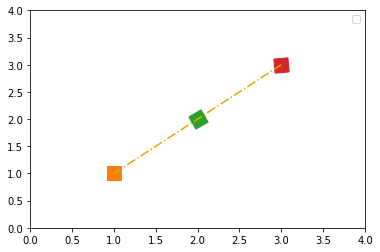

In [8]:
import matplotlib.pyplot as plt

x = {1:45,2:255,3:320}
for k, v in x.items():
    m = plt.plot(k, k, marker=(4, 0, (v)), markersize=20)

    plt.legend(handles=m)
    
plt.xlim([0,4])
plt.ylim([0,4])
plt.plot((1,3), (1,3),  linestyle='-.', c = '#d5aa05')
#plt.legend(marker)

plt.show()

Populating the interactive namespace from numpy and matplotlib


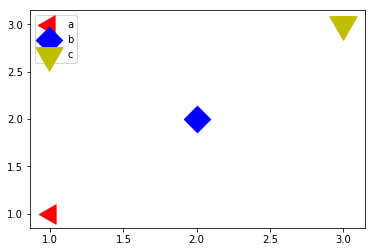

In [76]:
%pylab inline

import matplotlib.pyplot as plt
from numpy.random import randn

z = randn(10)


ma1 = marker=(3, 0, 90)
ma2 = marker=(4, 0, 90)
ma3 = marker=(3,0,180)
#plt.plot(marker = ma1)
a = plt.scatter(1, 1, marker=ma1,  color='r', s=500)
b = plt.scatter(2, 2, marker=ma2, color='b', s=700)
c = plt.scatter(3, 3, marker=ma3,  color='y', s=1000)



#red_dot, = plt.plot(ma1, "ro", markersize=15)
 
# Put a white cross over some of the data.
#white_cross, = plt.plot(z[:5], "w-", markeredgewidth=3, markersize=15)

plt.legend([a, b, c], ["a", "b", "c"])

In [200]:
from matplotlib import markers
from matplotlib.path import Path

def align_marker(marker, halign='center', valign='middle',):
    """
    create markers with specified alignment.

    Parameters
    ----------

    marker : a valid marker specification.
      See mpl.markers

    halign : string, float {'left', 'center', 'right'}
      Specifies the horizontal alignment of the marker. *float* values
      specify the alignment in units of the markersize/2 (0 is 'center',
      -1 is 'right', 1 is 'left').

    valign : string, float {'top', 'middle', 'bottom'}
      Specifies the vertical alignment of the marker. *float* values
      specify the alignment in units of the markersize/2 (0 is 'middle',
      -1 is 'top', 1 is 'bottom').

    Returns
    -------

    marker_array : numpy.ndarray
      A Nx2 array that specifies the marker path relative to the
      plot target point at (0, 0).

    Notes
    -----
    The mark_array can be passed directly to ax.plot and ax.scatter, e.g.::

        ax.plot(1, 1, marker=align_marker('>', 'left'))

    """

    if isinstance(halign, (str, unicode)):
        halign = {'right': -1.,
                  'middle': 0.,
                  'center': 0.,
                  'left': 1.,
                  }[halign]

    if isinstance(valign, (str, unicode)):
        valign = {'top': -1.,
                  'middle': 0.,
                  'center': 0.,
                  'bottom': 1.,
                  }[valign]

    # Define the base marker
    bm = markers.MarkerStyle(marker)

In [2]:
import pandas as pd
colordata = pd.read_clipboard()

In [3]:
colordata.columns

Index(['ndvi', 'RGB', 'HEX'], dtype='object')

In [4]:
colordata = colordata[['ndvi', 'HEX']]

for i in data['P. pinea']:
    
    a = str(i)
    if len(a) != 4:
        a.append('0')
    print(a)
    #print(colordata[str(i)])

NameError: name 'data' is not defined

In [8]:
d = np.round(data, decimals=2)
d = d.apply(pd.to_numeric, errors='coerce')

In [9]:
a = ['{0:.2f}'.format(i) for i in d['P. pinea']]

In [10]:
for i in a:
    print(type(i))
    print(colordata[float(i)])

<class 'str'>


KeyError: 0.75

In [5]:
for i in range(101):
    print(colordata[i/100])

KeyError: 0

In [11]:
colordict = colordata.to_dict()

In [6]:
aa = colordict['HEX']
for i in range(100):
    print(aa[i])

NameError: name 'colordict' is not defined

In [7]:
colordict = {'HEX': {0: '#1414B4',
  1: '#1916B1',
  2: '#1E19AE',
  3: '#241CAC',
  4: '#291EA9',
  5: '#2E21A6',
  6: '#3424A4',
  7: '#3926A1',
  8: '#3E299E',
  9: '#442C9C',
  10: '#492E99',
  11: '#4E3196',
  12: '#543494',
  13: '#593691',
  14: '#5E398E',
  15: '#643C8C',
  16: '#693E89',
  17: '#6E4186',
  18: '#744484',
  19: '#794681',
  20: '#7E497E',
  21: '#844C7C',
  22: '#894E79',
  23: '#8E5176',
  24: '#945474',
  25: '#995671',
  26: '#9E596E',
  27: '#A45C6C',
  28: '#A95E69',
  29: '#AE6166',
  30: '#B46464',
  31: '#B4695F',
  32: '#B46E5A',
  33: '#B47355',
  34: '#B47850',
  35: '#B47D4B',
  36: '#B48246',
  37: '#B48741',
  38: '#B48C3C',
  39: '#B49137',
  40: '#B49632',
  41: '#B49B2D',
  42: '#B4A028',
  43: '#B4A523',
  44: '#B4AA1E',
  45: '#B4AF19',
  46: '#B4B414',
  47: '#B4B90F',
  48: '#B4BE0A',
  49: '#B4C305',
  50: '#B4C800',
  51: '#ACC200',
  52: '#A5BC00',
  53: '#9EB600',
  54: '#97B000',
  55: '#90AA00',
  56: '#88A400',
  57: '#819E00',
  58: '#7A9800',
  59: '#739200',
  60: '#6C8C00',
  61: '#648600',
  62: '#5D8000',
  63: '#567A00',
  64: '#4F7400',
  65: '#486E00',
  66: '#406800',
  67: '#396200',
  68: '#325C00',
  69: '#2B5600',
  70: '#245000',
  71: '#1C4A00',
  72: '#154400',
  73: '#0E3E00',
  74: '#073800',
  75: '#003200',
  76: '#003000',
  77: '#002E00',
  78: '#002C00',
  79: '#002A00',
  80: '#002900',
  81: '#002700',
  82: '#002500',
  83: '#002300',
  84: '#002100',
  85: '#002000',
  86: '#001E00',
  87: '#001C00',
  88: '#001A00',
  89: '#001800',
  90: '#001700',
  91: '#001500',
  92: '#001300',
  93: '#001100',
  94: '#000F00',
  95: '#000E00',
  96: '#000C00',
  97: '#000A00',
  98: '#000800',
  99: '#000600',
  100: '#000500'},
 'ndvi': {0: 0.0,
  1: 0.01,
  2: 0.02,
  3: 0.029999999999999999,
  4: 0.040000000000000001,
  5: 0.050000000000000003,
  6: 0.059999999999999998,
  7: 0.070000000000000007,
  8: 0.080000000000000002,
  9: 0.089999999999999997,
  10: 0.10000000000000001,
  11: 0.11,
  12: 0.12,
  13: 0.13,
  14: 0.14000000000000001,
  15: 0.14999999999999999,
  16: 0.16,
  17: 0.17000000000000001,
  18: 0.17999999999999999,
  19: 0.19,
  20: 0.20000000000000001,
  21: 0.20999999999999999,
  22: 0.22,
  23: 0.23000000000000001,
  24: 0.23999999999999999,
  25: 0.25,
  26: 0.26000000000000001,
  27: 0.27000000000000002,
  28: 0.28000000000000003,
  29: 0.28999999999999998,
  30: 0.29999999999999999,
  31: 0.31,
  32: 0.32000000000000001,
  33: 0.33000000000000002,
  34: 0.34000000000000002,
  35: 0.34999999999999998,
  36: 0.35999999999999999,
  37: 0.37,
  38: 0.38,
  39: 0.39000000000000001,
  40: 0.40000000000000002,
  41: 0.40999999999999998,
  42: 0.41999999999999998,
  43: 0.42999999999999999,
  44: 0.44,
  45: 0.45000000000000001,
  46: 0.46000000000000002,
  47: 0.46999999999999997,
  48: 0.47999999999999998,
  49: 0.48999999999999999,
  50: 0.5,
  51: 0.51000000000000001,
  52: 0.52000000000000002,
  53: 0.53000000000000003,
  54: 0.54000000000000004,
  55: 0.55000000000000004,
  56: 0.56000000000000005,
  57: 0.56999999999999995,
  58: 0.57999999999999996,
  59: 0.58999999999999997,
  60: 0.59999999999999998,
  61: 0.60999999999999999,
  62: 0.62,
  63: 0.63,
  64: 0.64000000000000001,
  65: 0.65000000000000002,
  66: 0.66000000000000003,
  67: 0.67000000000000004,
  68: 0.68000000000000005,
  69: 0.68999999999999995,
  70: 0.69999999999999996,
  71: 0.70999999999999996,
  72: 0.71999999999999997,
  73: 0.72999999999999998,
  74: 0.73999999999999999,
  75: 0.75,
  76: 0.76000000000000001,
  77: 0.77000000000000002,
  78: 0.78000000000000003,
  79: 0.79000000000000004,
  80: 0.80000000000000004,
  81: 0.81000000000000005,
  82: 0.81999999999999995,
  83: 0.82999999999999996,
  84: 0.83999999999999997,
  85: 0.84999999999999998,
  86: 0.85999999999999999,
  87: 0.87,
  88: 0.88,
  89: 0.89000000000000001,
  90: 0.90000000000000002,
  91: 0.91000000000000003,
  92: 0.92000000000000004,
  93: 0.93000000000000005,
  94: 0.93999999999999995,
  95: 0.94999999999999996,
  96: 0.95999999999999996,
  97: 0.96999999999999997,
  98: 0.97999999999999998,
  99: 0.98999999999999999,
  100: 1.0}}

In [11]:
mycmap = colordict['HEX']

In [20]:
import numpy as np

# Save

np.save(r'C:\Users\Diego\Desktop\CursosLAST\my_cmap.npy', mycmap) 

# Load
aa = np.load('my_cmap.npy').item()
#print(read_dictionary.items()) # displays "world"

In [24]:
aa

{0: '#1414B4',
 1: '#1916B1',
 2: '#1E19AE',
 3: '#241CAC',
 4: '#291EA9',
 5: '#2E21A6',
 6: '#3424A4',
 7: '#3926A1',
 8: '#3E299E',
 9: '#442C9C',
 10: '#492E99',
 11: '#4E3196',
 12: '#543494',
 13: '#593691',
 14: '#5E398E',
 15: '#643C8C',
 16: '#693E89',
 17: '#6E4186',
 18: '#744484',
 19: '#794681',
 20: '#7E497E',
 21: '#844C7C',
 22: '#894E79',
 23: '#8E5176',
 24: '#945474',
 25: '#995671',
 26: '#9E596E',
 27: '#A45C6C',
 28: '#A95E69',
 29: '#AE6166',
 30: '#B46464',
 31: '#B4695F',
 32: '#B46E5A',
 33: '#B47355',
 34: '#B47850',
 35: '#B47D4B',
 36: '#B48246',
 37: '#B48741',
 38: '#B48C3C',
 39: '#B49137',
 40: '#B49632',
 41: '#B49B2D',
 42: '#B4A028',
 43: '#B4A523',
 44: '#B4AA1E',
 45: '#B4AF19',
 46: '#B4B414',
 47: '#B4B90F',
 48: '#B4BE0A',
 49: '#B4C305',
 50: '#B4C800',
 51: '#ACC200',
 52: '#A5BC00',
 53: '#9EB600',
 54: '#97B000',
 55: '#90AA00',
 56: '#88A400',
 57: '#819E00',
 58: '#7A9800',
 59: '#739200',
 60: '#6C8C00',
 61: '#648600',
 62: '#5D8000',
 6